<a href="https://colab.research.google.com/github/ola-sumbo/Hamoye-and-ML-with-Ude/blob/master/AXA_Vehicle_Insurance_Claim_'OlasumboB'.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries for Visualisation and ML**

In [1]:
#for data visualization
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
import missingno as mssno
seed=45

In [3]:
#for ML
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,StratifiedKFold
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle

**Data Loading and Preparation**
We load our data and explore data, this time separately

In [6]:
from google.colab import files
uploaded = files.upload()

Saving SampleSubmission.csv to SampleSubmission.csv


In [7]:
train = pd.read_csv('/content/Train (1).csv')
test = pd.read_csv('/content/Test (1).csv')

In [8]:
ss = pd.read_csv('/content/SampleSubmission.csv')

In [9]:
# join train and test together
ntrain = train.shape[0]
ntest = test.shape[0]

In [10]:
#Displaying Files
train.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


In [11]:
# display test
test.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,009D84L,2010-04-24,2011-03-27,NO GENDER,25,2010-04-24,1,NaN,As Attached,Iveco,Victoria Island,Lagos,CVTP
1,01DO2EQ,2010-01-01,2010-12-31,NaN,120,2010-01-01,4,NaN,As Attached,TOYOTA,Victoria Island,Lagos,Muuve
2,01QM0NU,2010-10-23,2011-10-22,Female,46,2010-10-23,1,NaN,NaN,Ford,Abuja Municipal,Abuja-Municipal,Car Classic
3,024NJLZ,2010-10-14,2011-10-13,Male,32,2010-10-14,1,NaN,NaN,NaN,Kosofe,Benue,Car Classic
4,02BYET3,2010-09-16,2010-12-31,NaN,120,2010-09-16,4,NaN,NaN,TOYOTA,Victoria Island,Lagos,Muuve


In [12]:
#Number of rows and columns
train.shape
#test.shape

(12079, 14)

In [13]:
#Description
train.describe()

,Age,No_Pol,target
count,12079.000000,12079.000000,12079.000000
mean,42.234539,1.307227,0.120457
std,97.492565,0.733085,0.325509
min,-6099.000000,1.000000,0.000000
25%,35.000000,1.000000,0.000000
50%,41.000000,1.000000,0.000000
75%,50.000000,1.000000,0.000000
max,320.000000,10.000000,1.000000


In [14]:
#Data Types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12079 non-null  object
 1   Policy Start Date       12079 non-null  object
 2   Policy End Date         12079 non-null  object
 3   Gender                  11720 non-null  object
 4   Age                     12079 non-null  int64 
 5   First Transaction Date  12079 non-null  object
 6   No_Pol                  12079 non-null  int64 
 7   Car_Category            8341 non-null   object
 8   Subject_Car_Colour      5117 non-null   object
 9   Subject_Car_Make        9603 non-null   object
 10  LGA_Name                5603 non-null   object
 11  State                   5591 non-null   object
 12  ProductName             12079 non-null  object
 13  target                  12079 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 1.3+ MB


In [15]:
all_data = pd.concat((train, test)).reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (17256, 14)


**Finding Null Values in the dataset**

In [16]:
#Finding the nul values as null value and filling with interpolate
all_data.isnull().sum()
all_data = all_data.interpolate()

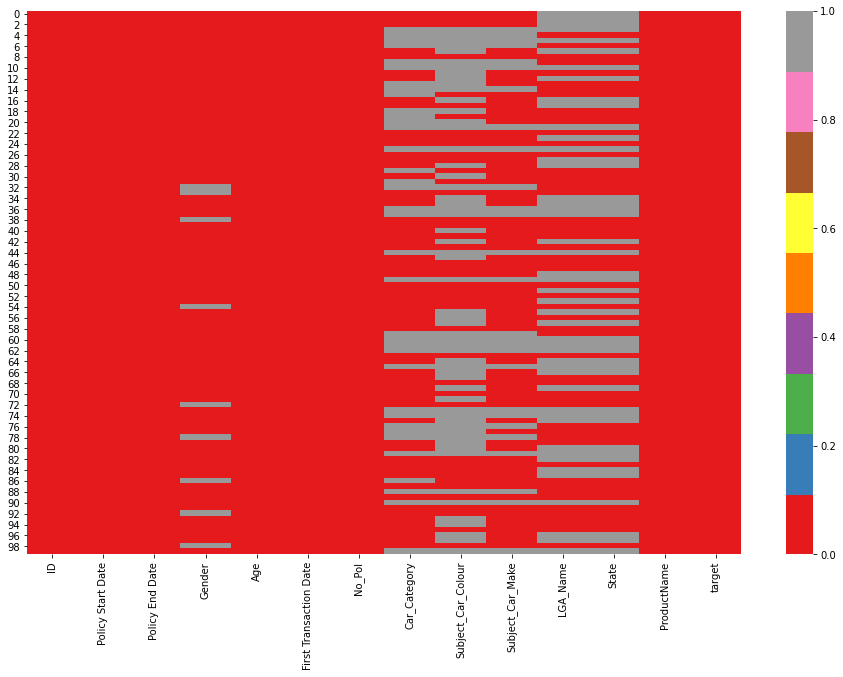

In [17]:
#Heat map for Null Values
plt.figure(figsize=(16,10))
sns.heatmap(all_data.head(100).isnull() == True, cmap='Set1')

In [18]:
# Code to get number of categories in missing value columns
print("Number of Categories in: ")
for ColName in all_data[['State','Gender','Car_Category', 'Subject_Car_Colour', 'Subject_Car_Make','LGA_Name','target']]:
  print("{} = {}".format(ColName, len(all_data[ColName].unique())))

Number of Categories in: 
State = 114
Gender = 8
Car_Category = 17
Subject_Car_Colour = 47
Subject_Car_Make = 76
LGA_Name = 271
target = 2


In [19]:
all_data.target.unique()

array([0., 1.])

In [20]:
all_data.isnull().sum()

ID                           0
Policy Start Date            0
Policy End Date              0
Gender                     515
Age                          0
First Transaction Date       0
No_Pol                       0
Car_Category              5376
Subject_Car_Colour        9967
Subject_Car_Make          3537
LGA_Name                  9258
State                     9276
ProductName                  0
target                       0
dtype: int64

**Data Visualization**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


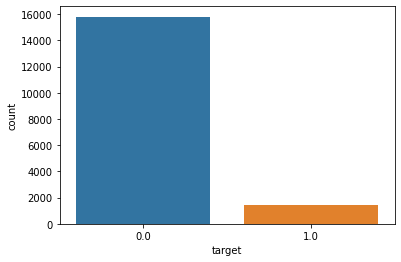

In [21]:
sns.countplot(all_data.target)

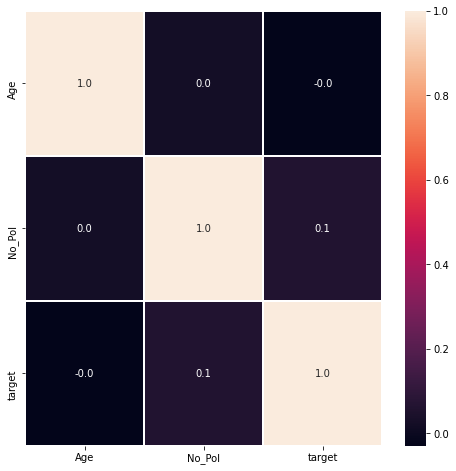

In [22]:
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(all_data.corr(),annot=True,linewidth=.5,fmt='.1f',ax=ax)
plt.show()

In [23]:
date_col = ['Policy Start Date','Policy End Date','First Transaction Date']
num_col = ['Age', 'No_Pol']
id_col = ['ID']
cat_col = [col for col in all_data.columns if col not in date_col+num_col+id_col]
cat_col

['Gender',
 'Car_Category',
 'Subject_Car_Colour',
 'Subject_Car_Make',
 'LGA_Name',
 'State',
 'ProductName',
 'target']

In [24]:
def check_categorical_relationship(cat_col,y_col,df):
    for feat in cat_col:
        plt.figure(figsize=(20,5))
        sns.barplot(df[feat],df[y_col])
        plt.show()
        print("\n \n \n ")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


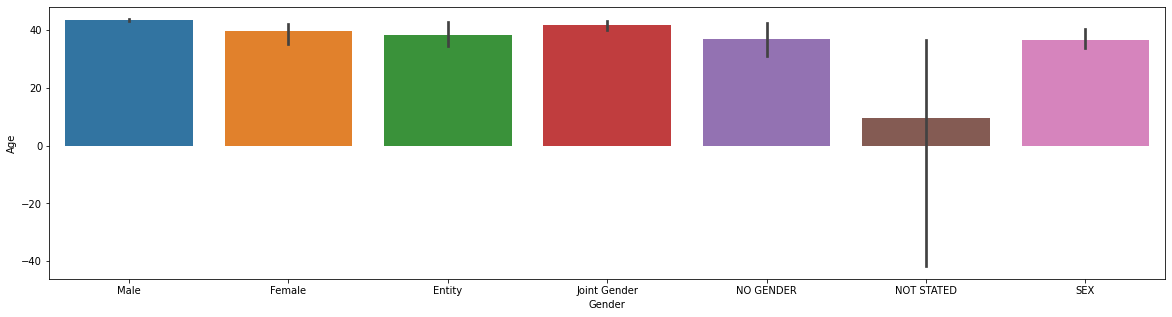

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


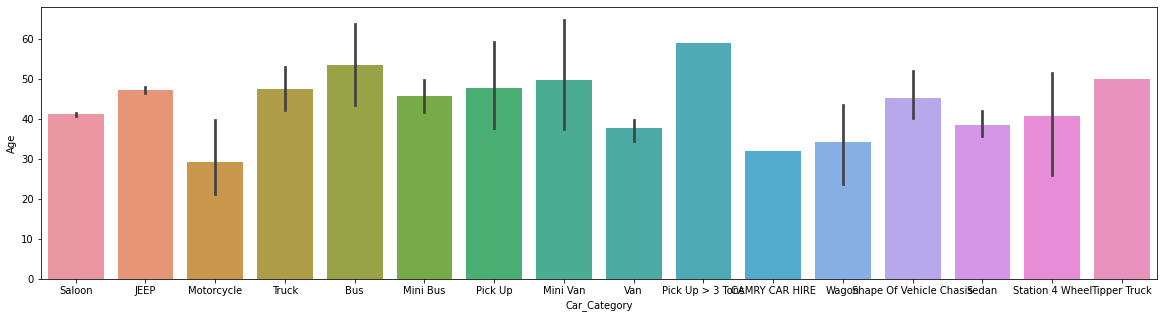

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


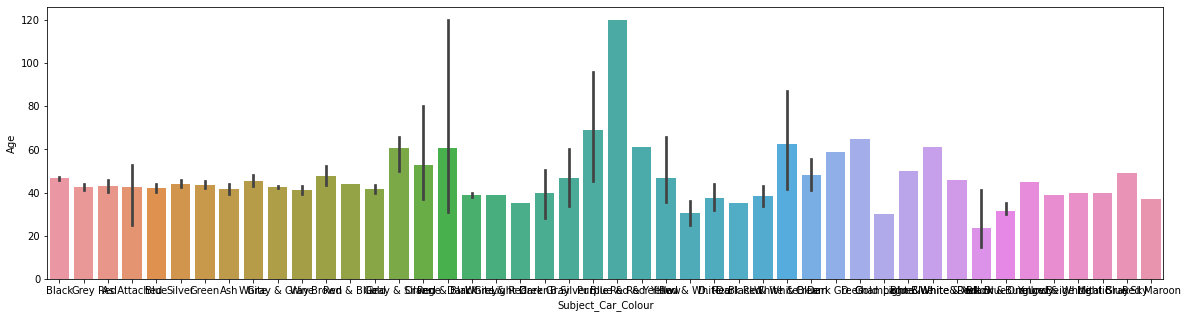

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


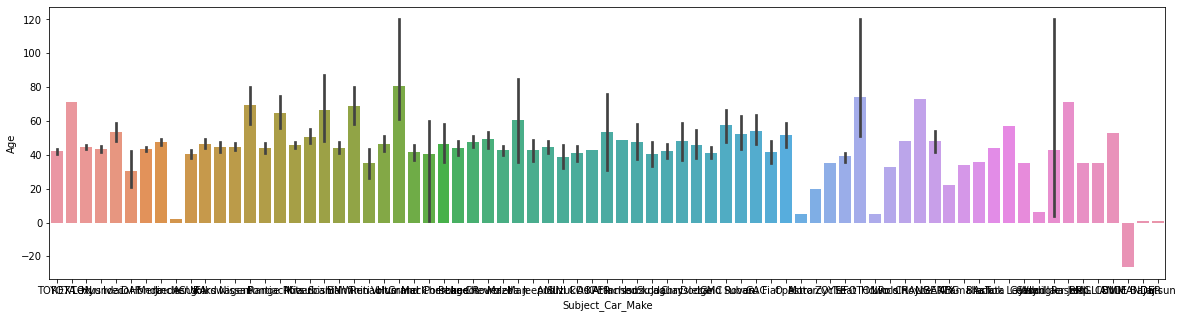

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


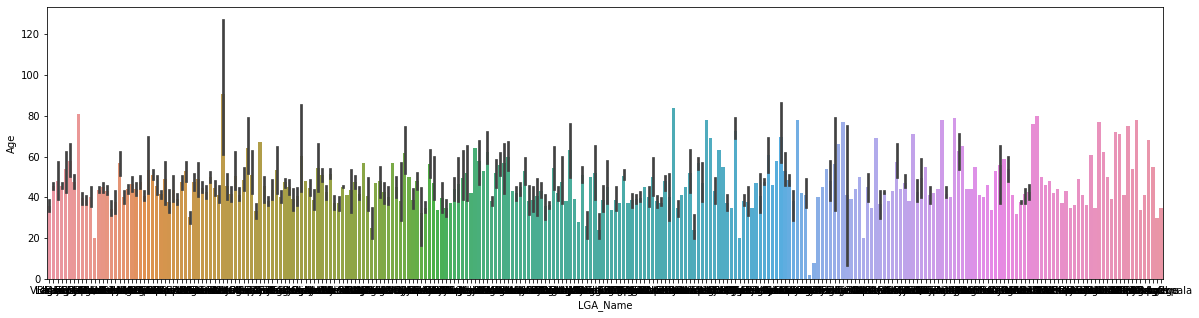

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


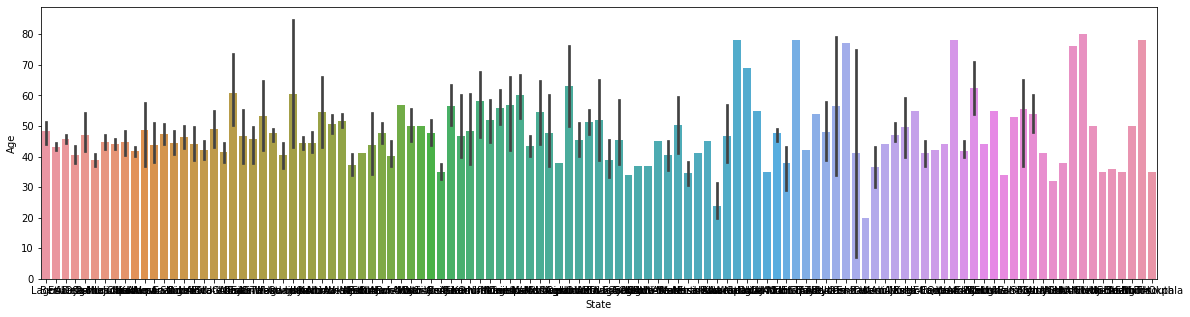

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


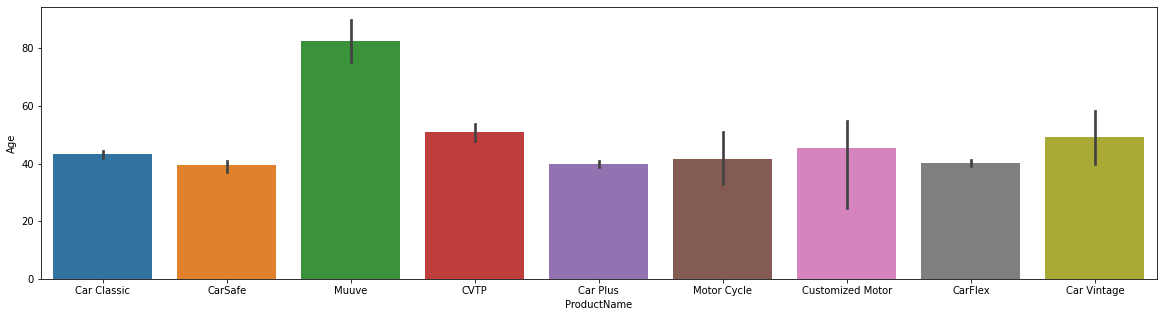

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


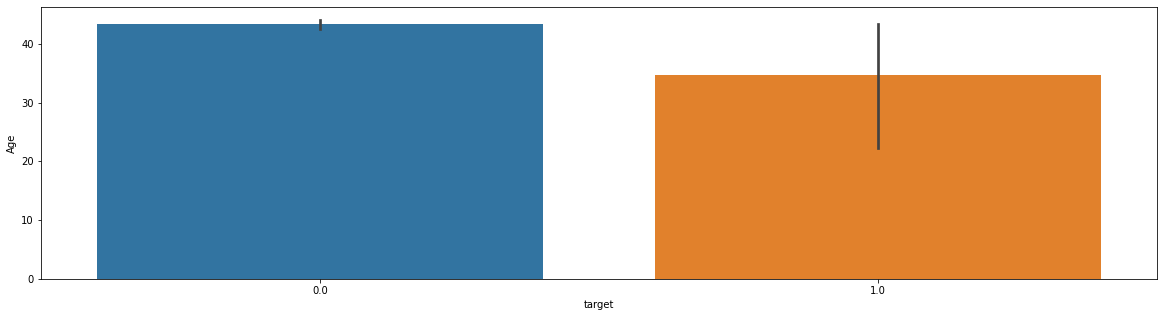

In [25]:
check_categorical_relationship(cat_col,'Age',all_data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


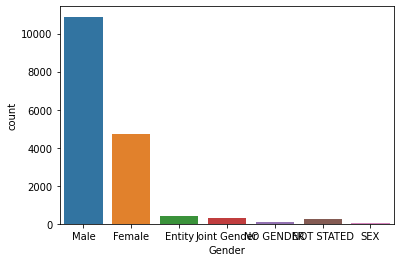

In [36]:
# Gender distribution 
sns.countplot(all_data.Gender)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

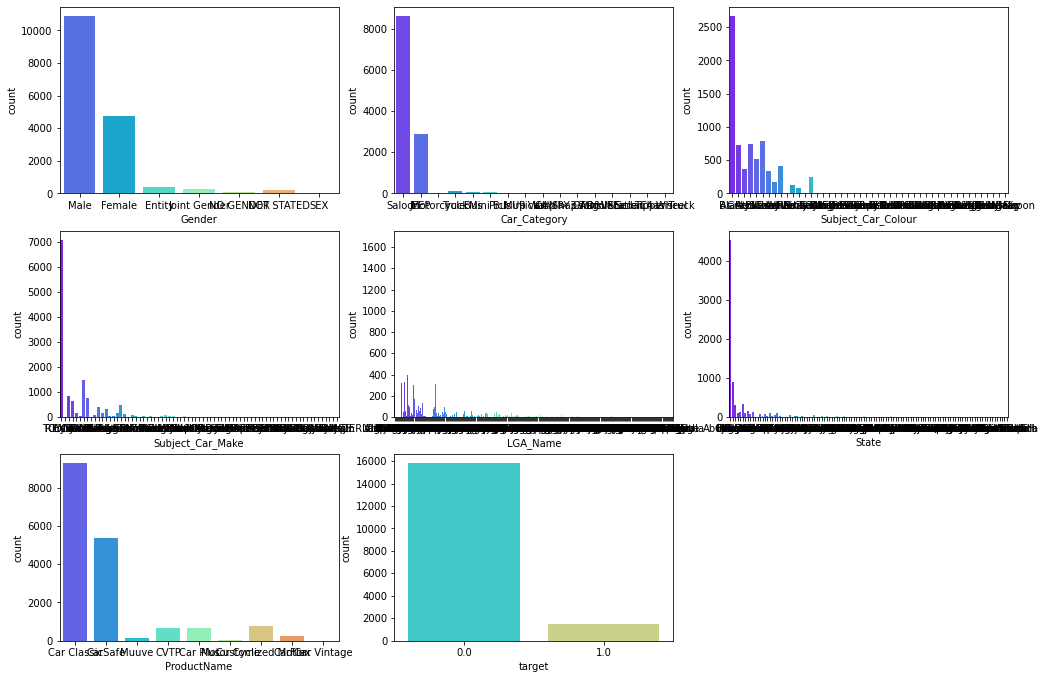

In [27]:
#Categorical values visualization
plt.figure(figsize=(17,24))
for i, c in enumerate(cat_col):
    ax = plt.subplot(6,3,i+1)
    sns.countplot(all_data[c],palette='rainbow')

In [28]:
all_data.Gender.unique()

array(['Male', 'Female', 'Entity', 'Joint Gender', nan, 'NO GENDER',
       'NOT STATED', 'SEX'], dtype=object)

In [29]:
mapper = {"Male":"M","Female":'F','Entity':'O','Joint Gender':'O',9999:'O','NO GENDER':'O','NOT STATED':'O','SEX':'O' }

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


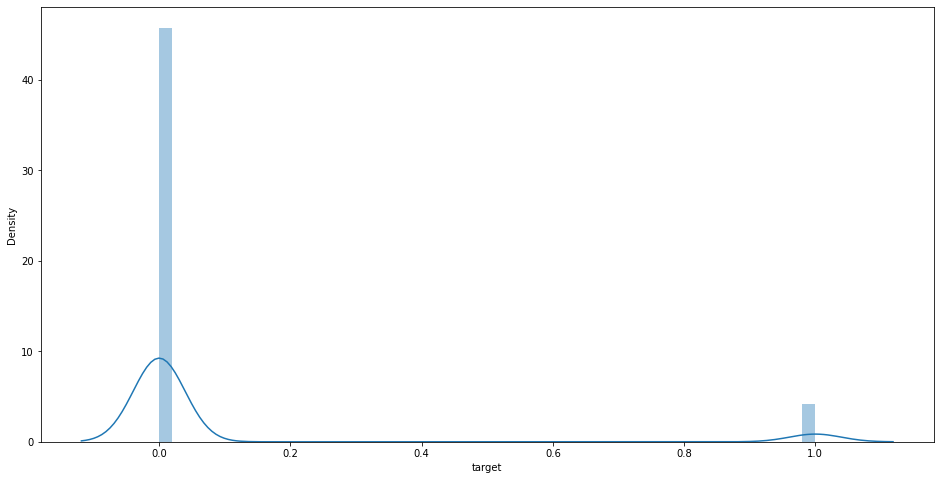

In [30]:
import seaborn as sns
plt.figure(figsize=(16, 8))
sns.distplot(all_data["target"])

**Basic Data Pre-Processing**

In [31]:
date_col

['Policy Start Date', 'Policy End Date', 'First Transaction Date']

In [32]:
for feat in date_col:
    all_data[feat] = pd.to_datetime(all_data[feat])

In [37]:
#and for the test set
all_data['Newtransact Y/N'] = np.where(all_data['Policy Start Date'] ==all_data['First Transaction Date'], 'No', 'Yes')
# Now we subtract
all_data['Age of policy'] = pd.to_datetime(all_data['Policy End Date']) - pd.to_datetime(all_data['Policy Start Date'])
all_data['Age of policy'] = all_data['Age of policy'].dt.days.astype(float) + (all_data['Age of policy'].dt.seconds.astype(float) / 86400)
all_data['Newtransact Y/N'] = all_data['Newtransact Y/N'].astype('category')

In [ ]:
#import datetime
#def extract_date_info(df,cols,):
   # for feat in cols:
       # df[feat +'_year'] = df[feat].dt.quarter
       # df[feat +'_day'] = df[feat].dt.day
       # df[feat +'_month'] = df[feat].dt.month
       # df[feat +'_quarter'] = df[feat].dt.quarter
   # df.drop(columns=date_col,axis=1,inplace=True)

In [ ]:
#extract_date_info(all_data,date_col)

In [43]:
all_data.drop(['Policy Start Date', 'Policy End Date', 'First Transaction Date'], axis=1, inplace=True)
all_data

,ID,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Newtransact Y/N,Age of policy
0,0040R73,Male,30,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0.0,No,364.0
1,0046BNK,Female,79,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1.0,No,364.0
2,005QMC3,Male,43,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0.0,No,364.0
3,0079OHW,Male,2,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0.0,No,364.0
4,00BRP63,Entity,20,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1.0,No,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17251,ZYXX5AF,Male,48,1,Saloon,NaN,Honda,NaN,NaN,CarSafe,0.0,No,364.0
17252,ZYYOZ5L,NaN,50,1,NaN,NaN,NaN,Victoria Island,Lagos,Car Classic,0.0,No,364.0
17253,ZZ1GTKD,Male,1,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0.0,No,364.0
17254,ZZDXQSI,Female,52,1,Saloon,Grey,TOYOTA,NaN,NaN,Car Classic,0.0,No,364.0


**Pre-processing Gender**

In [44]:
all_data.Gender = all_data.Gender.map(mapper)

In [45]:
all_data.Gender.unique()

array(['M', 'F', 'O', nan], dtype=object)

In [ ]:
#all_data = pd.get_dummies(all_data)

**Creat Base model**

In [47]:
#Check the distribution of variables
all_data.target = all_data.target.astype(int)

In [48]:
all_data.drop(columns=['ID'],inplace=True)

In [50]:
#1. Function to impute null value with new category
def impute_nan_create_category(all_data,ColName):
     all_data[ColName] = np.where(all_data[ColName].isnull(),"Unknown",all_data[ColName])
## Call function to create new category for variables
for Columns in ['State','Gender','Car_Category', 'Subject_Car_Colour' ,'Subject_Car_Make','LGA_Name']:
    impute_nan_create_category(all_data,Columns)
#2. Display result
all_data[['State','Gender','Car_Category', 'Subject_Car_Colour','Subject_Car_Make','LGA_Name']].head(10)

,State,Gender,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name
0,Unknown,M,Saloon,Black,TOYOTA,Unknown
1,Unknown,F,JEEP,Grey,TOYOTA,Unknown
2,Unknown,M,Saloon,Red,TOYOTA,Unknown
3,Unknown,M,Unknown,Unknown,Unknown,Unknown
4,Lagos,O,Unknown,Unknown,Unknown,Lagos
5,Unknown,M,Unknown,Unknown,Unknown,Unknown
6,Lagos,F,Unknown,Unknown,Unknown,Ikeja
7,Unknown,M,Saloon,Unknown,TOYOTA,Unknown
8,Benue,F,JEEP,Black,REXTON,Badagry
9,Eti-Osa,F,Unknown,Unknown,Unknown,Eti-Osa


In [51]:
#all_data = all_data.fillna(9999)
all_data.head()

,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Newtransact Y/N,Age of policy
0,M,30,1,Saloon,Black,TOYOTA,Unknown,Unknown,Car Classic,0,No,364.0
1,F,79,1,JEEP,Grey,TOYOTA,Unknown,Unknown,Car Classic,1,No,364.0
2,M,43,1,Saloon,Red,TOYOTA,Unknown,Unknown,Car Classic,0,No,364.0
3,M,2,1,Unknown,Unknown,Unknown,Unknown,Unknown,CarSafe,0,No,364.0
4,O,20,3,Unknown,Unknown,Unknown,Lagos,Lagos,Muuve,1,No,124.0


In [52]:
#Get the new dataset
train_n = all_data[:ntrain]
test_n = all_data[ntrain:]

In [54]:
desired_apriori=0.10

# Get the indices per target value
idx_0 = train_n[train_n.target == 0].index
idx_1 = train_n[train_n.target == 1].index

# Get original number of records per target value
nb_0 = len(train_n.loc[idx_0])
nb_1 = len(train_n.loc[idx_1])

# Calculate the undersampling rate and resulting number of records with target=0
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_1 = int(undersampling_rate*nb_1)
print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=1 after undersampling: {}'.format(undersampled_nb_1))

# Randomly select records with target=0 to get at the desired a priori
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_1)

# Construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)


Rate to undersample records with target=0: 1.232586596385542
Number of records with target=1 after undersampling: 1793


In [55]:
# Return undersample data frame
train_n = train_n.loc[idx_list].reset_index(drop=True)

In [56]:
test_n.drop("target",axis = 1,inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [65]:
X= train_n.drop(columns=['target'])
y= train_n.target

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [60]:
test_n.columns

Index(['Gender', 'Age', 'No_Pol', 'Car_Category', 'Subject_Car_Colour',
       'Subject_Car_Make', 'LGA_Name', 'State', 'ProductName',
       'Newtransact Y/N', 'Age of policy'],
      dtype='object')

In [61]:
categorical_feat = ['Gender', 'Age', 'No_Pol', 'Car_Category', 'Subject_Car_Colour',
       'Subject_Car_Make', 'LGA_Name', 'State', 'ProductName','Newtransact Y/N']

**Logistic Regression**

In [63]:
!pip install catboost
from catboost import CatBoostClassifier
import catboost
model = CatBoostClassifier(cat_features=categorical_feat,verbose=50)

     |████████████████████████████████| 66.3MB 56kB/s 


In [67]:
model.fit(X_train,y_train)

Learning rate set to 0.014359
0:	learn: 0.6875383	total: 58.6ms	remaining: 58.6s
50:	learn: 0.5580004	total: 443ms	remaining: 8.24s
100:	learn: 0.5179606	total: 855ms	remaining: 7.61s
150:	learn: 0.4929498	total: 1.3s	remaining: 7.33s
200:	learn: 0.4779589	total: 1.76s	remaining: 7.01s
250:	learn: 0.4673730	total: 2.23s	remaining: 6.66s
300:	learn: 0.4588617	total: 2.67s	remaining: 6.19s
350:	learn: 0.4514794	total: 3.1s	remaining: 5.73s
400:	learn: 0.4445581	total: 3.54s	remaining: 5.29s
450:	learn: 0.4385599	total: 4s	remaining: 4.87s
500:	learn: 0.4327328	total: 4.46s	remaining: 4.44s
550:	learn: 0.4269451	total: 4.91s	remaining: 4s
600:	learn: 0.4215527	total: 5.37s	remaining: 3.56s
650:	learn: 0.4154646	total: 5.84s	remaining: 3.13s
700:	learn: 0.4102378	total: 6.31s	remaining: 2.69s
750:	learn: 0.4045202	total: 6.78s	remaining: 2.25s
800:	learn: 0.3989872	total: 7.25s	remaining: 1.8s
850:	learn: 0.3938434	total: 7.72s	remaining: 1.35s
900:	learn: 0.3881243	total: 8.19s	remaining:

In [68]:
y_pred = model.predict(X_train)

In [69]:
from sklearn.metrics import classification_report

In [70]:
target_names = ['class 0', 'class 1']
print('*************** Classification report on training set ********************')
print(classification_report(y_train, y_pred, target_names=target_names))

*************** Classification report on training set ********************
              precision    recall  f1-score   support

     class 0       0.91      0.77      0.84      1187
     class 1       0.77      0.91      0.83       989

    accuracy                           0.84      2176
   macro avg       0.84      0.84      0.84      2176
weighted avg       0.85      0.84      0.84      2176



In [71]:
print('*************** Classification report on testing set ********************')
print(classification_report(y_test, model.predict(X_test), target_names=target_names))

*************** Classification report on testing set ********************
              precision    recall  f1-score   support

     class 0       0.83      0.68      0.75       606
     class 1       0.66      0.81      0.73       466

    accuracy                           0.74      1072
   macro avg       0.74      0.75      0.74      1072
weighted avg       0.76      0.74      0.74      1072



**Train on full train dataset**

In [72]:
model.fit(X,y)

Learning rate set to 0.017037
0:	learn: 0.6861345	total: 14ms	remaining: 14s
50:	learn: 0.5357042	total: 501ms	remaining: 9.32s
100:	learn: 0.4984864	total: 1.01s	remaining: 9.03s
150:	learn: 0.4804512	total: 1.53s	remaining: 8.59s
200:	learn: 0.4669238	total: 2.06s	remaining: 8.18s
250:	learn: 0.4580409	total: 2.57s	remaining: 7.66s
300:	learn: 0.4506138	total: 3.1s	remaining: 7.21s
350:	learn: 0.4438394	total: 3.64s	remaining: 6.72s
400:	learn: 0.4374994	total: 4.18s	remaining: 6.24s
450:	learn: 0.4317619	total: 4.73s	remaining: 5.76s
500:	learn: 0.4257452	total: 5.27s	remaining: 5.25s
550:	learn: 0.4204190	total: 5.8s	remaining: 4.72s
600:	learn: 0.4144582	total: 6.36s	remaining: 4.22s
650:	learn: 0.4083842	total: 6.92s	remaining: 3.71s
700:	learn: 0.4030840	total: 7.47s	remaining: 3.19s
750:	learn: 0.3976140	total: 8.04s	remaining: 2.67s
800:	learn: 0.3928529	total: 8.59s	remaining: 2.13s
850:	learn: 0.3873484	total: 9.16s	remaining: 1.6s
900:	learn: 0.3825257	total: 9.71s	remainin

**First Submission File**

In [73]:
set(test.ID == ss.ID)

{True}

In [74]:
prediction = model.predict(test_n)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


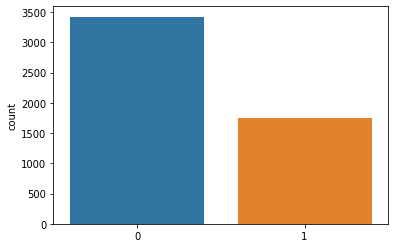

In [75]:
sns.countplot(prediction)

In [76]:
ss.head()

,ID,target
0,009D84L,0
1,01DO2EQ,0
2,01QM0NU,0
3,024NJLZ,0
4,02BYET3,0


In [77]:
sub_file = ss.copy()

In [78]:
sub_file.target = prediction

In [79]:
sub_file.to_csv('base_sim_pred_file.csv',index=False)